In [1]:
import numpy as np
import scipy as sp
from numpy import linalg as nla
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We implement the dimensionless system from ROBERTS ET AL. (2016):
$$\begin{align}
x'&=\rho \delta (x^2 - ax)+x[x+y+c-c\tanh (x+z)] \\
y'&=-\rho \delta(ay+x^2) \\
z'&=\delta(k-z-\frac{x}{2})
\end{align}$$
where:
$x=\frac{S}{S_0}=\frac{T_2-T_1}{S_0}$, $y=\frac{T}{T_0}=\frac{T_1-T_r}{T_0}$, $z=\frac{h}{h_0}=\frac{h_1+H-z_0}{h_0}=\frac{h_1+K}{h_0}$ 

$T_1$ and $T_2$ are the equatorial temperatures respectively in the western and eastern Pacific, $T_r$ is the temperature that the tropical Pacific would attain in the absence of ocean dynamics, $h_1$ is the thermocline depth of the western Pacific, $H$ is the an eastern thermocline reference depth

In [2]:
def model(r):
    x=r[0]
    y=r[1]
    z=r[2]
    rho=0.3224
    delta=0.225423
    a=7.453
    k=0.4032
    c=2.3952
    x1=1.0*(rho*delta*(x*x-a*x)+x*(x+y+c-c*np.tanh(x+z)))
    y1=-1.0*rho*delta*(a*y+x*x)
    z1=delta*(k-z-0.5*x)
    return (np.array([x1,y1,z1]))

The version of order 4 Runge-Kutta I will implement is, for a differential equation $\dot{y}=f(t,y)$:
$$k_1=f(t_n,y_n)$$
$$k_2=f(t_n+\frac{h}{2},y_n+\frac{k_1}{2})$$
$$k_3=f(t_n+\frac{h}{2},y_n+\frac{k_2}{2})$$
$$k_4=f(t_n+h,y_n+k_1)$$
$$y_{n+1}=y_n+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$$

In [17]:
tmax=2000
h=0.01
t=0
x=-3
y=0
z=0
valx=[x]
valy=[y]
valz=[z]
valt=[0]
r=np.array([x,y,z])
while (t<tmax):
    
    k1=model(r)
    k2=model(r+0.5*h*k1)
    k3=model(r+0.5*h*k2)
    k4=model(r+k3*h)
    
    r=r+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx.append(r[0])
    valy.append(r[1])
    valz.append(r[2])
    t=t+h
    valt.append(t)     

<IPython.core.display.Javascript object>


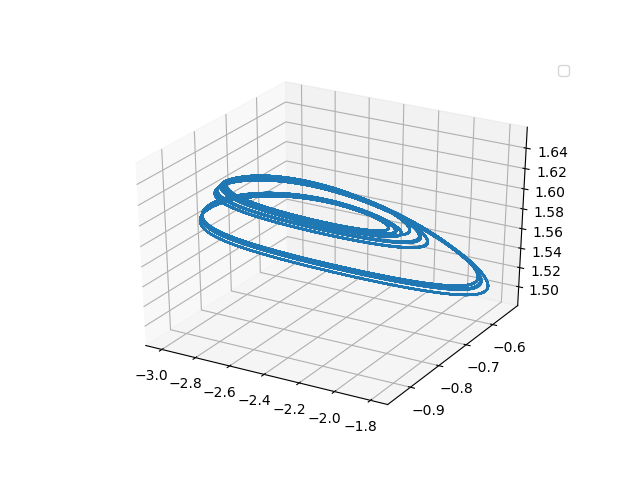

No handles with labels found to put in legend.


In [18]:
del valx[0:50000]
del valy[0:50000]
del valz[0:50000]
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(valx, valy, valz)
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


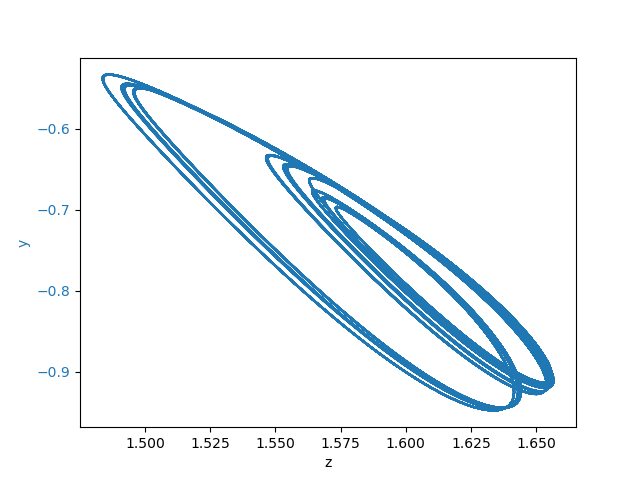

In [19]:
fig2, ax2 = plt.subplots()

color = 'tab:blue'
ax2.set_xlabel('z')
ax2.set_ylabel('y', color=color)
ax2.plot(valz, valy, color=color)
ax2.tick_params(axis='y', labelcolor=color)